In [64]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as st
from joblib import Parallel, delayed
import tempfile
import shutil
import os
%matplotlib inline
plt.style.use('ggplot')

In [67]:
def Brownian(t,sig):
    x=np.random.randn(len(t)-1)
    path=np.empty(len(t))
    path[0]=0
    for i in xrange(1,len(t)):
        deltaT=t[i]-t[i-1]
        sqrT=np.sqrt(deltaT)
        path[i]=path[i-1]+sqrT*sig*x[i-1]#construct euler path
    return path
def GetSimulation(t,sig,sample):
    Median=np.empty(sample)
    Av=np.empty(sample)
    for i in range(sample):
        path=Brownian(t,sig)
        Median[i]=np.median(path);
        Av[i]=np.mean(path)
    stats={}
    stats['Median']=Median
    stats['Mean']=Av
    return  stats
def SErrSimu(t,sigs,sample,i):
    #get three row, the 0: mean, 1:std;2:relative std
    res=GetSimulation(t,sigs[i],sample);
    output=np.empty(3)
    Error=res['Median']-res['Mean'];
    output[0]=np.mean(Error);
    output[1]=np.std(Error);
    output[2]=output[1]/np.std(res['Median']);
    print(np.mean(output))
    return output
'''    
Parallel(n_jobs=4)(delayed(sum_row)(samples, sums, i)
   
   for i in range(samples.shape[0]))
'''
def ErrorSimulation(t,sigs,sample):
    #get the error in every simulation at eversig; compute the average and std.
    #compute the std of Medinane, stor it in the series, plot it as graph
   # output=np.empty((3,len(sigs)),dtype=float)
    #meanErr=np.empty(len(sigs))
    #stdErr=np.empty(len(sigs))
    #relativeErr=np.empty(len(sigs))
    i=0
    output=Parallel(n_jobs=-1, verbose=1)(delayed(SErrSimu)(t,sigs,sample,i) for i in range(len(sigs)))
    return output
    #Get The simulation in the parrled ways
#    for sig in sigs:
 #       res=GetSimulation(t,sig,sample)
 #       Error=res['Median']-res['Mean'];
 #       meanErr[i]=np.mean(Error);
 #       stdErr[i]=np.mean(Error);
  #      i++;

In [73]:
#setting
t=range(0,401)
sigs=np.linspace(1,101,100)
sample=1000
output=ErrorSimulation(t,sigs,sample)
output=np.asmatrix(output)

[Parallel(n_jobs=-1)]: Done   1 out of 100 | elapsed:    1.8s remaining:  3.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


0.733887244227
1.42140096207
1.96188473282.6001436601

3.331698952713.98924460353

4.180766837064.77176722129

6.678782019776.01571230698

8.443880042097.74422692175

9.662668361018.97593444306

10.699239344510.0336215262

11.225658039210.6044939365

12.781718494612.1449598222

14.374527015113.7232861754

16.039429108915.3731365788

17.826657631517.1428434336

17.225271171116.6116701645

19.91764884219.2552294159

21.459590508620.7904434774

20.546229691719.9432540227

23.387245223322.7389088602

24.405038595723.764006992

24.34447995223.7369745572

25.396620395726.0149375466

30.687352273431.39988896

29.820989893130.4826065559

30.682299837131.3341529114

32.672142801233.3379482638

35.240135039635.9302091497

34.90289961235.5605878585

37.687658461638.3720223435

40.578119545441.2892263503

36.265292623336.8791205124

39.024763814638.3960598175

41.425642186742.082440857

45.69331573146.3955213927

46.858291972247.5569950957

43.244418343943.8704694883

47.234578018647.8992080029

4

In [77]:
output

matrix([[  8.49141669e-02,   1.95700158e+00,   1.59745991e-01],
        [  1.70686053e-01,   3.93377084e+00,   1.59745991e-01],
        [ -1.61382509e-01,   5.88656509e+00,   1.60471621e-01],
        [ -2.15356592e-01,   7.85531595e+00,   1.60471621e-01],
        [  2.85380593e-01,   9.55807780e+00,   1.51638465e-01],
        [  3.42571093e-01,   1.14735243e+01,   1.51638465e-01],
        [  2.60929979e-01,   1.21323481e+01,   1.49022454e-01],
        [  2.98259018e-01,   1.38680202e+01,   1.49022454e-01],
        [ -7.11915148e-01,   1.85949053e+01,   1.64146767e-01],
        [ -7.91104820e-01,   2.06633041e+01,   1.64146767e-01],
        [  6.29931849e-01,   2.24376315e+01,   1.65117388e-01],
        [  6.87250489e-01,   2.44792722e+01,   1.65117388e-01],
        [ -3.02905429e-01,   2.70649262e+01,   1.65782547e-01],
        [ -3.26223783e-01,   2.91484463e+01,   1.65782547e-01],
        [  5.25681783e-02,   2.98802651e+01,   1.68031291e-01],
        [  5.60750615e-02,   3.18736117e

# ploting

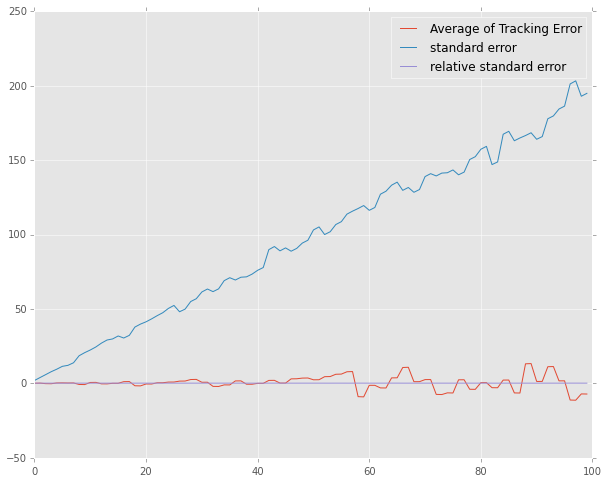

In [88]:
fig,ax=plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,8))
ax.plot(range(len(sigs)),output[:,0],label='Average of Tracking Error')
ax.plot(range(len(sigs)),output[:,1],label='standard error')
ax.plot(range(len(sigs)),output[:,2],label='relative standard error')
ax.legend()

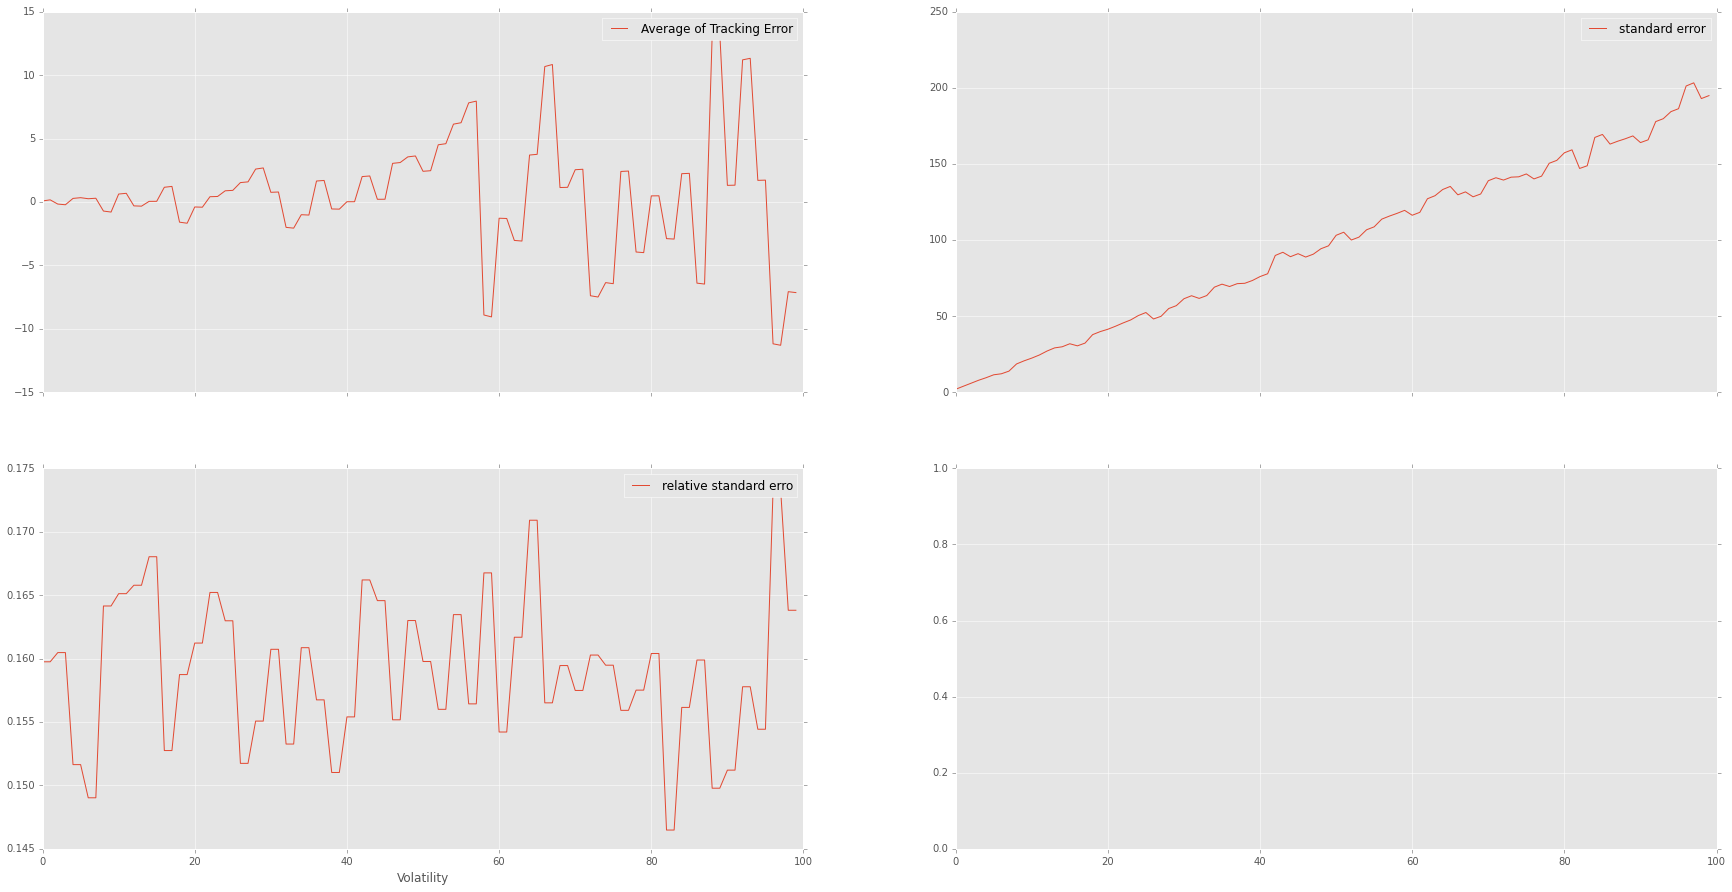

In [91]:
fig,ax=plt.subplots(2,2,sharex=True,sharey=False,figsize=(30,15))
ax[0,0].plot(range(len(sigs)),output[:,0],label='Average of Tracking Error')
ax[0,0].legend()
ax[0,1].plot(range(len(sigs)),output[:,1],label='standard error ')
ax[0,1].legend()
ax[1,0].plot(range(len(sigs)),output[:,2],label='relative standard erro')
ax[1,0].legend()
ax[1,0].set_xlabel('Volatility')

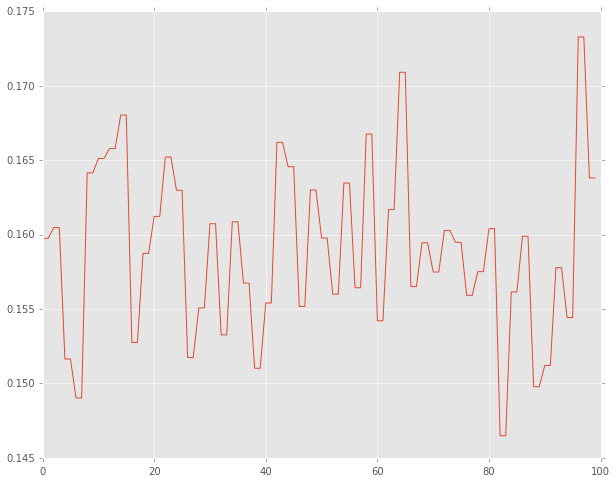

In [92]:
fig,ax=plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,8))
ax.plot(range(len(sigs)),output[:,2],label='relative standard error')